In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.DataFrame()
df['x'] = np.random.normal(size=1000)

In [20]:
df['ytrue'] = np.random.normal(-1.5 + 2 * df.x)

<AxesSubplot:xlabel='x', ylabel='ytrue'>

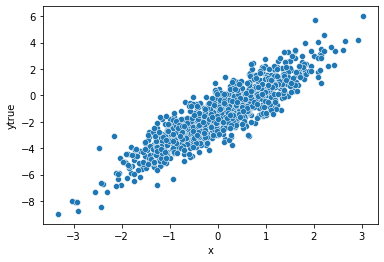

In [25]:
sns.scatterplot(x=df.x, y= df.ytrue, data=df)

In [27]:
def make_line(x, w0, w1):
    ypred = w0 + x * w1
    return ypred

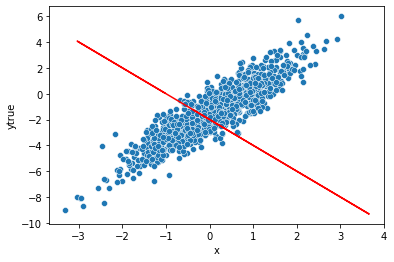

In [54]:
plt = sns.scatterplot(x=df.x, y= df.ytrue, data=df)
plt.plot(x, make_line(x, -2.0, -2.0), color = 'red' )

In [37]:
def mse(ytrue, ypred):
  error = np.mean((ytrue-ypred)**2)
  return error

In [38]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

In [49]:
def calc_gradient(x, ytrue, w0, w1):
    dw=0.0001
    ypred = make_line(x, w0, w1)
    
    w1_change = w1 + dw
    ypred_w1 = make_line(x, w0, w1_change)
    deriv_w1 = (mse(ytrue, ypred_w1) - mse(ytrue, ypred)) / dw
    
    w0_change = w0 + dw
    ypred_w0 = make_line(x, w0_change, w1)
    deriv_w0 = (mse(ytrue, ypred_w0) - mse(ytrue, ypred)) / dw
    
    return [deriv_w1, deriv_w0]

In [55]:
w0 = -1.0 # arbitrary starting value
w1 = 5.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500

In [60]:
for i in range(MAX_ITER):
    gr = calc_gradient(df.x, df.ytrue, w0, w1)
    print(gr)
    if abs(LR * gr[0]) < 0.0001 and abs(LR * gr[1]) < 0.0001:
        break
    w0 = w0 - LR * gr[0]
    w1 = w1 - LR * gr[1]
    print(i, w0, w1)

[5.983936921314381, 1.2604017676487445]
0 -1.5983936921314381 4.8739598232351256
[5.684598508821637, 0.052739595908235515]
1 -2.166853543013602 4.868685863644302
[5.625186609190536, -1.084635144703583]
2 -2.7293722039326553 4.97714937811466
[5.789817426489208, -2.20031419919664]
3 -3.308353946581576 5.197180798034324
[6.172294023905067, -3.339293301838353]
4 -3.925583348972083 5.53111012821816
[6.7753160169914395, -4.544940575819112]
5 -4.603114950671227 5.985604185800071
[7.610082937432594, -5.860789884195583]
6 -5.364123244414486 6.571683174219629
[8.696253468514215, -7.332239386101946]
7 -6.233748591265908 7.304907112829824
[10.062238850139238, -9.008227280631331]
8 -7.239972476279831 8.205729840892957
[11.745823093747276, -10.94295177253457]
9 -8.414554785654559 9.300025018146414
[13.795115871175767, -13.197700246934119]
10 -9.794066372772136 10.619795042839826
[16.26985666860037, -15.84285323332324]
11 -11.421052039632173 12.20408036617215
[19.243101547203878, -18.96013191498014]


[94371840000.0, -115343360000.0]
141 -59514475314.612366 64336412776.02663
[104857600000.0, -115343360000.0]
142 -70000235314.61237 75870748776.02663
[146800640000.0, -188743680000.0]
143 -84680299314.61237 94745116776.02663
[167772160000.0, -230686720000.0]
144 -101457515314.61237 117813788776.02663
[293601280000.0, -419430400000.0]
145 -130817643314.61237 159756828776.0266
[83886080000.0, -167772160000.0]
146 -139206251314.61237 176534044776.0266
[251658240000.0, -335544320000.0]
147 -164372075314.61237 210088476776.0266
[251658240000.0, -335544320000.0]
148 -189537899314.61237 243642908776.0266
[167772160000.0, -503316480000.0]
149 -206315115314.61237 293974556776.0266
[671088640000.0, -167772160000.0]
150 -273423979314.61237 310751772776.0266
[671088640000.0, -671088640000.0]
151 -340532843314.61237 377860636776.0266
[671088640000.0, -671088640000.0]
152 -407641707314.61237 444969500776.0266
[2013265920000.0, -671088640000.0]
153 -608968299314.6123 512078364776.0266
[671088640000.0

<AxesSubplot:xlabel='x', ylabel='ytrue'>

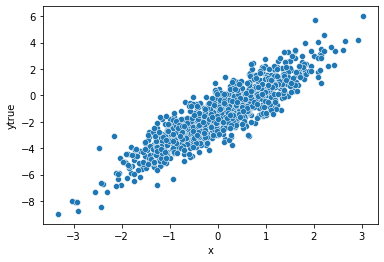

In [72]:
sns.scatterplot(x=df.x, y= df.ytrue, data=df)
sns.lineplot(df.x, make_line(df['x'], w0, w1), color = 'red')